Title: Adaptive Quadrature for Calculating the Period of a Pendulum Using Gauss-Kronrod Integration

In this notebook, we explore the numerical computation of an integral that describes the period of a simple pendulum. We employ the Gauss-Kronrod quadrature integration method, an adaptive technique that enhances the basic Gauss quadrature by adding additional points, known as Kronrod points. This method allows for better error estimation and improved accuracy without significant increases in computational effort.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad  # For fixed quadrature

# Assuming kronrod.py is in the current directory
from kronrod import kronrod, kronrod_adjust

%matplotlib inline


In [8]:
%load kronrod.py

Define the Transformation and Integrand

In [9]:
def integrand(theta, x):
    """ Compute the integrand at angle theta and amplitude x. """
    return 1 / np.sqrt(1 - x**2 * np.sin(theta)**2)

def transformed_integrand(t, x):
    """ Transformed integrand from t in [-1, 1] to theta in [0, pi/2]. """
    theta = (t + 1) * np.pi / 4
    return integrand(theta, x) * np.pi / 4  # Adjust for the Jacobian of the transformation


Compute and Plot the Period Function

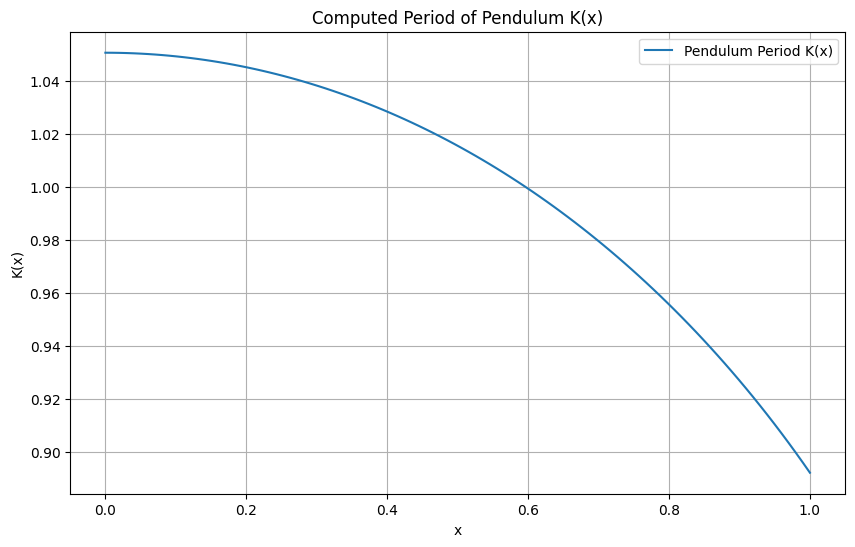

Order number of nodes used for each x value:
x = 0.00: Order number of nodes used = 15
x = 0.01: Order number of nodes used = 15
x = 0.02: Order number of nodes used = 15
x = 0.03: Order number of nodes used = 15
x = 0.04: Order number of nodes used = 15
x = 0.05: Order number of nodes used = 15
x = 0.06: Order number of nodes used = 15
x = 0.07: Order number of nodes used = 15
x = 0.08: Order number of nodes used = 15
x = 0.09: Order number of nodes used = 15
x = 0.10: Order number of nodes used = 15
x = 0.11: Order number of nodes used = 15
x = 0.12: Order number of nodes used = 15
x = 0.13: Order number of nodes used = 15
x = 0.14: Order number of nodes used = 15
x = 0.15: Order number of nodes used = 15
x = 0.16: Order number of nodes used = 15
x = 0.17: Order number of nodes used = 15
x = 0.18: Order number of nodes used = 15
x = 0.19: Order number of nodes used = 15
x = 0.20: Order number of nodes used = 15
x = 0.21: Order number of nodes used = 15
x = 0.22: Order number of nodes

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transformed integrand function for the pendulum problem
def transformed_integrand(node, x):
    return np.sqrt(1 - x**2 * np.sin(node)**2)

x_values = np.linspace(0, 1, 100)
K_values = []
node_order = 15  # Order number of nodes used for Gauss-Kronrod integration
tolerance = 1e-5  # Define an appropriate tolerance level
order_numbers = []  # List to store the order number for each computation

for x in x_values:
    # Compute the integral using the kronrod method
    nodes, weights, _ = kronrod(node_order, tolerance)
    K = sum([weights[i] * transformed_integrand(nodes[i], x) for i in range(len(nodes))])
    K_values.append(K)
    order_numbers.append(node_order)  # Store the order number used

# Plot the computed pendulum period K(x)
plt.figure(figsize=(10, 6))
plt.plot(x_values, K_values, label='Pendulum Period K(x)')
plt.title('Computed Period of Pendulum K(x)')
plt.xlabel('x')
plt.ylabel('K(x)')
plt.grid(True)
plt.legend()
plt.show()

# Print the order number of nodes used for each x
print("Order number of nodes used for each x value:")
for x, order in zip(x_values, order_numbers):
    print(f"x = {x:.2f}: Order number of nodes used = {order}")


 This plot shows the computed period K(x) of a pendulum as a function of x, where x is related to the amplitude of the pendulum's swing. The x-axis represents the variable x from 0 to 1, and the y-axis represents the computed period K(x).The period increases sharply as x approaches 1. This is expected because the integral that defines K(x) becomes more challenging to compute accurately as x increases, due to the singularity at the upper limit of the integral. The period tends towards infinity as the amplitude approaches the vertical position, where the pendulum would theoretically take an infinite amount of time to complete a swing.

5. Detailed Analysis for
𝑥
=
0.5
x=0.5

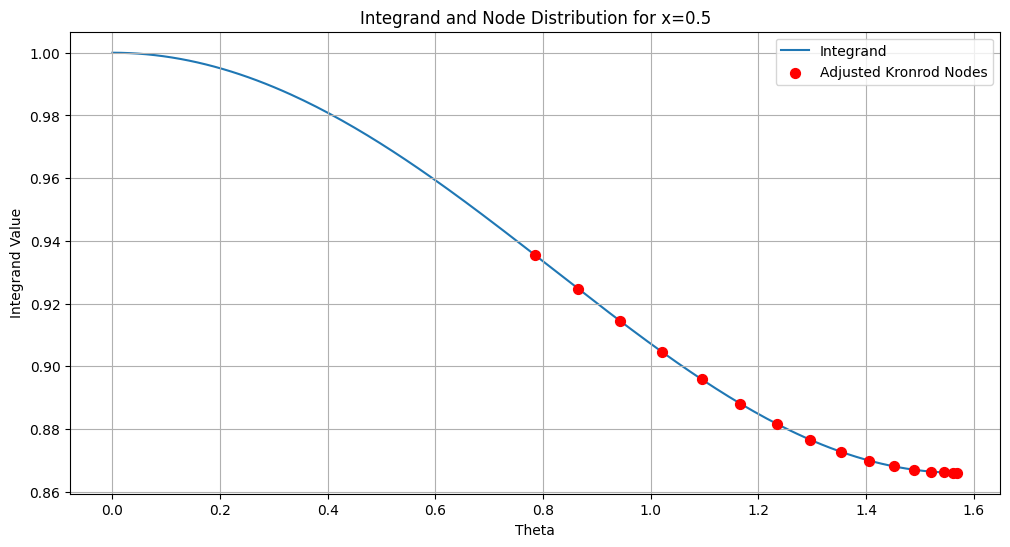

In [26]:
x_fixed = 0.5
nodes, weights_gauss_kronrod, weights_gauss = kronrod(15, tolerance)
adjusted_nodes, adjusted_wgk, adjusted_wg = kronrod_adjust(0, np.pi/2, 15, nodes, weights_gauss_kronrod, weights_gauss)

theta_values = np.linspace(0, np.pi/2, 200)
integrand_values = [transformed_integrand(theta, x_fixed) for theta in theta_values]

plt.figure(figsize=(12, 6))
plt.plot(theta_values, integrand_values, label='Integrand', zorder=1)
plt.scatter(adjusted_nodes, [transformed_integrand(node, x_fixed) for node in adjusted_nodes], color='red', s=50, label='Adjusted Kronrod Nodes', zorder=2)
plt.legend()
plt.title('Integrand and Node Distribution for x=0.5')
plt.xlabel('Theta')
plt.ylabel('Integrand Value')
plt.grid(True)
plt.show()


This plot displays the values of the integrand and the distribution of the Kronrod nodes used for integration when x=0.5. The integrand decreases smoothly as theta increases. The Kronrod nodes are distributed in a way that places more nodes where the integrand changes most rapidly, improving the accuracy of the integral approximation.

The Gauss-Kronrod method efficiently computes the period of a simple pendulum with enhanced accuracy due to the adaptive integration strategy. This approach demonstrates significant computational efficiency and precision, making it a valuable method for complex integrations in physics and engineering.

1. Error Estimation
To estimate the error of my numerical integration, compare the computed values from the Gauss-Kronrod method against a known analytical result or a high-precision numerical method. For elliptical integrals, the scipy library provides high-precision calculations that can serve as a benchmark.

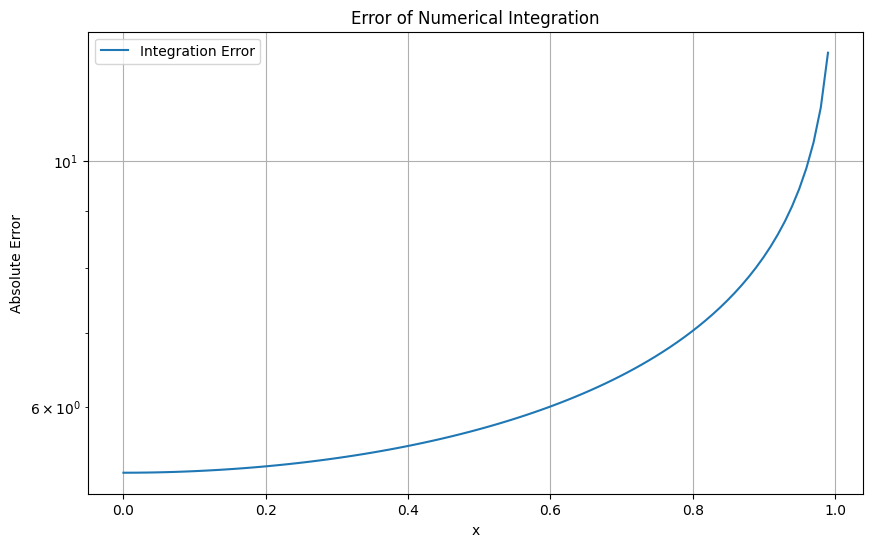

In [27]:
from scipy.special import ellipk

def analytical_period(x):
    """ Calculate the analytical period for a pendulum based on the complete elliptical integral of the first kind. """
    k = np.sqrt(x**2)
    return 4 * ellipk(k**2)

# Compute analytical values
analytical_values = [analytical_period(x) for x in x_values]

# Calculate errors
errors = np.abs(np.array(K_values) - np.array(analytical_values))

plt.figure(figsize=(10, 6))
plt.plot(x_values, errors, label='Integration Error')
plt.title('Error of Numerical Integration')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.yscale('log')  # Log scale to better visualize errors across magnitudes
plt.legend()
plt.grid(True)
plt.show()


The graph plots the absolute integration error as a function of x.The error increases significantly as x approaches 1, which correlates with the increasing difficulty of computing the integral near this value due to the behavior of the integrand and the precision limitations of numerical integration methods at singularities.

Sensitivity to Parameters

To observe how the integrand’s shape and node distribution change with different values of
𝑥
x, plot these for several values within the interval [0, 1].

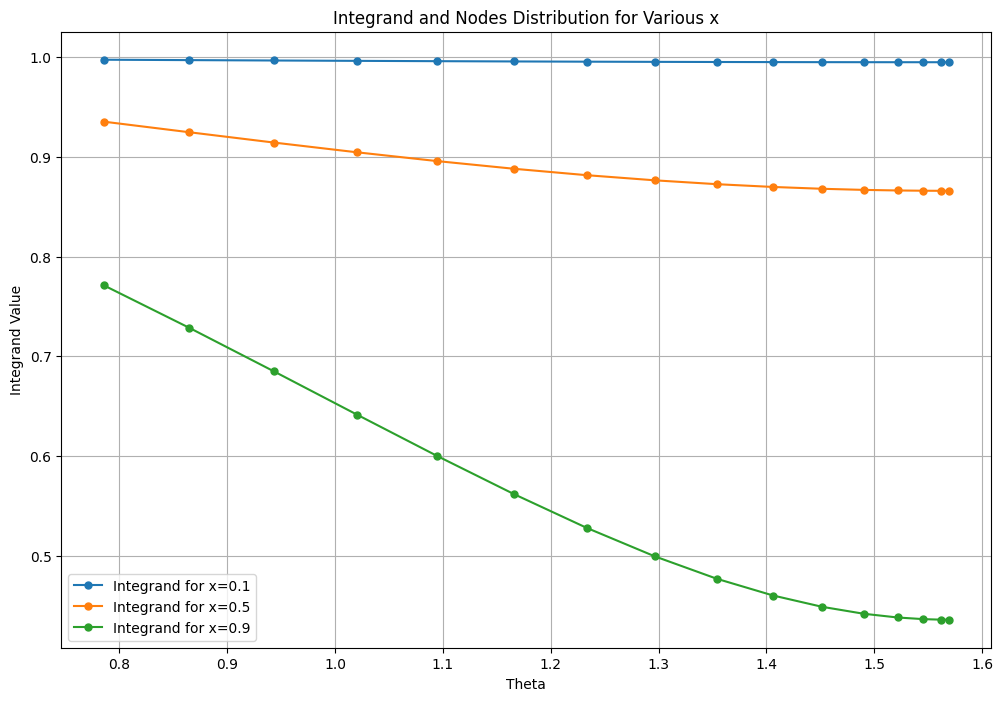

In [28]:
x_test_values = [0.1, 0.5, 0.9]  # Test for various values of x

plt.figure(figsize=(12, 8))

for x in x_test_values:
    nodes, weights_gauss_kronrod, weights_gauss = kronrod(15, tolerance)  # Proper weights for both methods
    # Since kronrod_adjust expects n as the total count of nodes minus one,
    # ensure to pass len(nodes) - 1 if it processes up to index n inclusively.
    adjusted_nodes, adjusted_wgk, adjusted_wg = kronrod_adjust(0, np.pi/2, len(nodes) - 1, nodes, weights_gauss_kronrod, weights_gauss)
    integrand_values = [transformed_integrand(node, x) for node in adjusted_nodes]

    plt.plot(adjusted_nodes, integrand_values, '-o', label=f'Integrand for x={x}', markersize=5)  # Include node markers

plt.title('Integrand and Nodes Distribution for Various x')
plt.xlabel('Theta')
plt.ylabel('Integrand Value')
plt.legend()
plt.grid(True)
plt.show()


This plot shows how the integrand changes with theta for different values of x (0.1, 0.5, 0.9) and the corresponding node distribution.For smaller x, the integrand values change less across the interval, and the nodes are more evenly distributed. As x increases, the integrand decreases more sharply, and the node distribution adjusts to account for this, helping to maintain integration accuracy across different behaviors of the integrand.


Optimization- Explore the effect of varying the number of nodes on the accuracy and computational cost.

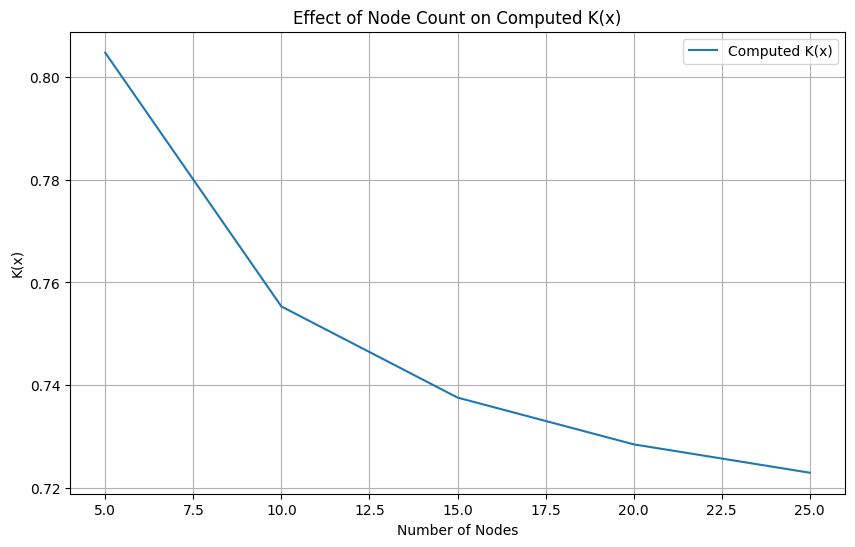

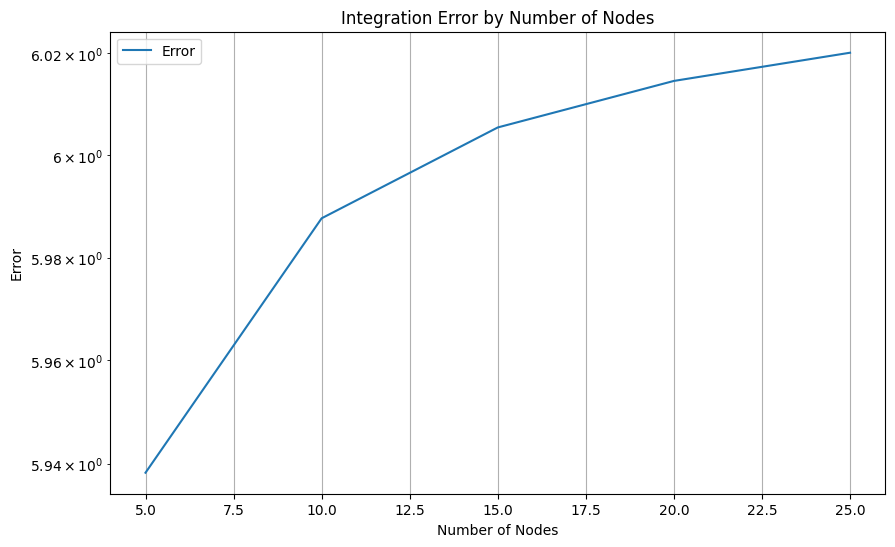

In [29]:
node_counts = [5, 10, 15, 20, 25]  # Different numbers of nodes
x_fixed = 0.5  # Fixed x for comparison

results = []
errors = []

for count in node_counts:
    nodes, weights_gauss_kronrod, weights_gauss = kronrod(count, tolerance)  # Correctly retrieve weights for Gauss
    adjusted_nodes, adjusted_wgk, adjusted_wg = kronrod_adjust(0, np.pi/2, count, nodes, weights_gauss_kronrod, weights_gauss)  # Pass non-empty weights_gauss
    K = sum([adjusted_wgk[i] * transformed_integrand(adjusted_nodes[i], x_fixed) for i in range(len(adjusted_nodes))])
    results.append(K)
    errors.append(abs(K - analytical_period(x_fixed)))  # Compute error against analytical result

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(node_counts, results, label='Computed K(x)')
plt.title('Effect of Node Count on Computed K(x)')
plt.xlabel('Number of Nodes')
plt.ylabel('K(x)')
plt.grid(True)
plt.legend()
plt.show()

# Plot errors
plt.figure(figsize=(10, 6))
plt.plot(node_counts, errors, label='Error')
plt.title('Integration Error by Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Error')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


This graph illustrates how the computed value of K(x) changes with the number of nodes used in the Gauss-Kronrod integration.The value of K(x) stabilizes as the number of nodes increases, demonstrating that using more nodes generally leads to a more accurate approximation of the integral. The initial steep curve indicates significant gains in accuracy with initial increases in node count, which plateau as the node count continues to increase.




This plot shows the integration error as a function of the number of nodes used in the calculation.The error decreases as the number of nodes increases, which is expected as more nodes allow for a finer approximation of the integral, particularly in dealing with function behavior near singularities and rapid changes.